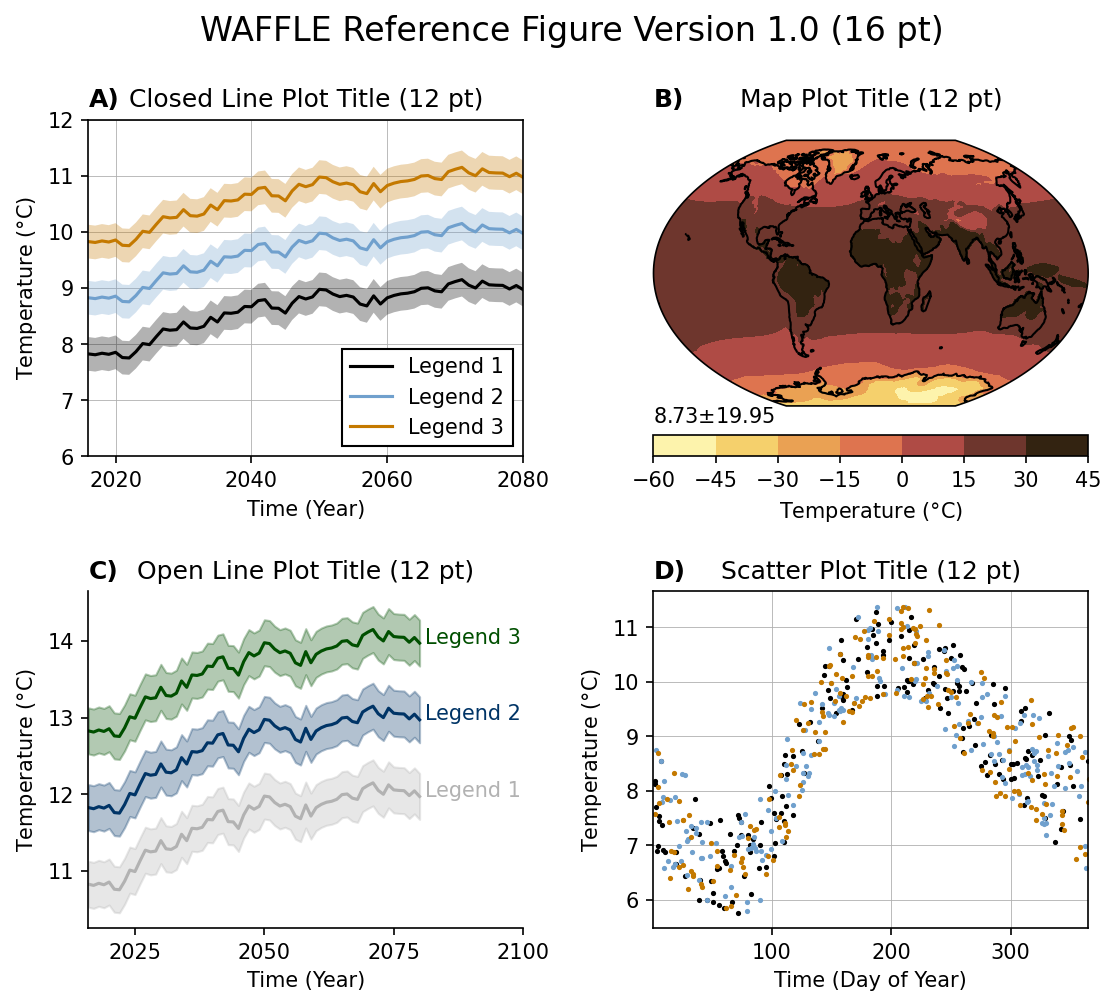

In [261]:
import matplotlib.font_manager
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib.transforms import ScaledTranslation
import xarray
import matplotlib.colors as mcolors
import numpy as np
import math
from matplotlib.dates import date2num
import cftime
import datetime
import nc_time_axis


# PATHS
PATH_CMAP_TEMPSEQ = "../ipcc_colormaps/continuous_colormaps_rgb_0-1/temp_seq.txt"
PATH_MPLSTYLE_PACL = 'pacl.mplstyle'
PATH_SAMPLE_SPATIAL = "sample_spatial_ds.nc"
PATH_SAMPLE_TS = "sample_timeseries_ds.nc"
PATH_SAMPLE_TS_DAY = "sample_day_timeseries_ds.nc"

# CONFIGS
SAMPLE_VAR = "tasmax"
LINE_COLORS = ['#000000', '#70A0CD', '#C47900', '#B2B2B2', '#003466', '#004F00']
SHADE_COLORS = ['#808080', '#5BAEB2', '#CCAE71', '#BFBFBF', '#4393C3', '#DFEDC3']

# Initialization

plt.style.use(PATH_MPLSTYLE_PACL)
cmap_temp_seq = mcolors.LinearSegmentedColormap.from_list('colormap', np.loadtxt(PATH_CMAP_TEMPSEQ))

# Plotting functions

def addSubPlotLabels(f):
    for index, ax in enumerate(f.axes):
        label = chr(ord('@') + (index + 1 % 26))
        ax.set_title(f"{label})", loc="left", fontweight="bold")


class WinkelTripel(ccrs._WarpedRectangularProjection):
    def __init__(self, central_longitude=0.0, central_latitude=0.0, globe=None):
        globe = globe or ccrs.Globe(semimajor_axis=ccrs.WGS84_SEMIMAJOR_AXIS)
        proj4_params = [('proj', 'wintri'),
                        ('lon_0', central_longitude),
                        ('lat_0', central_latitude)]

        super(WinkelTripel, self).__init__(proj4_params, central_longitude, globe=globe)

    @property
    def threshold(self):
        return 1e4

# End of functions

sample_spatial_ds = xarray.open_dataset(PATH_SAMPLE_SPATIAL)[SAMPLE_VAR] - 273.15
sample_ts_ds = xarray.open_dataset(PATH_SAMPLE_TS)[SAMPLE_VAR] - 273.15
sample_day_ts_ds = xarray.open_dataset(PATH_SAMPLE_TS_DAY)[SAMPLE_VAR] - 273.15

sample_ts_ds = sample_ts_ds.sel(time=slice(
    cftime.DatetimeNoLeap(2015, 12, 31, 0, 0, 0, 0, has_year_zero=True),
    cftime.DatetimeNoLeap(2080, 1, 1, 0, 0, 0, 0, has_year_zero=True)
))

f = plt.figure()
gridspec = f.add_gridspec(2, 2, height_ratios=[2, 2])


ax1 = f.add_subplot(gridspec[0, 0])
ax2 = f.add_subplot(gridspec[0, 1])

ax3 = f.add_subplot(gridspec[1, 0])
ax4 = f.add_subplot(gridspec[1, 1])

ax1.set_title("Closed Line Plot Title (12 pt)")
ax2.set_title("Map Plot Title (12 pt)")

ax3.set_title("Open Line Plot Title (12 pt)")
ax4.set_title("Scatter Plot Title (12 pt)")

f.suptitle("WAFFLE Reference Figure Version 1.0 (16 pt)")

ax1.set_xlabel("Time (Year)")
ax3.set_xlabel("Time (Year)")
ax4.set_xlabel("Time (Day of Year)")


ax1.set_ylabel("Temperature ($\\degree$C)")
ax3.set_ylabel("Temperature ($\\degree$C)")
ax4.set_ylabel("Temperature ($\\degree$C)")

addSubPlotLabels(f)

ax1.xaxis.set_major_formatter(nc_time_axis.CFTimeFormatter("%Y", "noleap"))

ax1.plot(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values, label="Legend 1")
ax1.plot(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values + 1, label="Legend 2")
ax1.plot(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values + 2, label="Legend 3")

ax1.legend(fancybox=False)

ax1.fill_between(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values - 0.3, sample_ts_ds.mean(dim="member").values + 0.3, alpha=0.3)
ax1.fill_between(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values - 0.3 + 1, sample_ts_ds.mean(dim="member").values + 0.3 + 1, alpha=0.3)
ax1.fill_between(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values - 0.3 + 2, sample_ts_ds.mean(dim="member").values + 0.3 + 2, alpha=0.3)


ax1.set_xlim(cftime.DatetimeNoLeap(2015, 12, 31, 0, 0, 0, 0, has_year_zero=True),
             cftime.DatetimeNoLeap(2080, 1, 1, 0, 0, 0, 0, has_year_zero=True))
ax1.set_ylim(6, 12)

ax3.plot(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values + 3, color=LINE_COLORS[3])
ax3.plot(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values + 4, color=LINE_COLORS[4])
ax3.plot(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values + 5, color=LINE_COLORS[5])

ax3.fill_between(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values - 0.3 + 3, sample_ts_ds.mean(dim="member").values + 0.3 + 3, alpha=0.3, color=LINE_COLORS[3])
ax3.fill_between(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values - 0.3 + 4, sample_ts_ds.mean(dim="member").values + 0.3 + 4, alpha=0.3, color=LINE_COLORS[4])
ax3.fill_between(sample_ts_ds.time.values, sample_ts_ds.mean(dim="member").values - 0.3 + 5, sample_ts_ds.mean(dim="member").values + 0.3 + 5, alpha=0.3, color=LINE_COLORS[5])

ax3.set_xlim(cftime.DatetimeNoLeap(2015, 12, 31, 0, 0, 0, 0, has_year_zero=True),
             cftime.DatetimeNoLeap(2100, 1, 1, 0, 0, 0, 0, has_year_zero=True))

date_pt = cftime.DatetimeNoLeap(2080, 12, 31, 0, 0, 0, 0, has_year_zero=True)
ax3.text(date_pt, sample_ts_ds.mean(dim="member").values[-1] + 3, "Legend 1", fontdict=dict(color=LINE_COLORS[3]))
ax3.text(date_pt, sample_ts_ds.mean(dim="member").values[-1] + 4, "Legend 2", fontdict=dict(color=LINE_COLORS[4]))
ax3.text(date_pt, sample_ts_ds.mean(dim="member").values[-1] + 5, "Legend 3", fontdict=dict(color=LINE_COLORS[5]))

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(False)

ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.grid(False)

props = dict(facecolor='white', pad=0.4, edgecolor='white')
ax2.text(0, 0.1, f"{round(float(sample_spatial_ds.mean().values), 2)}$\\pm {round(float(sample_spatial_ds.std().values), 2)}$", bbox=props)

ax2 = f.add_axes(ax2.get_position(), frameon=True, projection=WinkelTripel(), zorder=-1)

cyclic_values, cyclic_lons = add_cyclic_point(sample_spatial_ds.values, sample_spatial_ds.lon.values, axis=-1)
ax2_contour = ax2.contourf(cyclic_lons, sample_spatial_ds.lat.values, cyclic_values, transform=ccrs.PlateCarree(), cmap=cmap_temp_seq)
ax2_cbar = f.colorbar(ax2_contour, location="bottom", anchor=(0.0, 0.0), pad=0)
ax2_cbar.set_label("Temperature ($\\degree$C)")
ax2.coastlines()

N = 100

days = [date.dayofyr + 1 for date in sample_day_ts_ds.time.values]
vals = sample_day_ts_ds.values

indices = [int(index) for index in np.random.random(200)*len(days)]
ax4.scatter([days[index] for index in indices], [vals[index] for index in indices])

indices = [int(index) for index in np.random.random(200)*len(days)]
ax4.scatter([days[index] for index in indices], [vals[index] for index in indices])

indices = [int(index) for index in np.random.random(200)*len(days)]
ax4.scatter([days[index] for index in indices], [vals[index] for index in indices])

ax4.set_xlim(1, 365)

# Add mean +- std in text box
# Add PACL copyright
# Figure out legend

f.show()

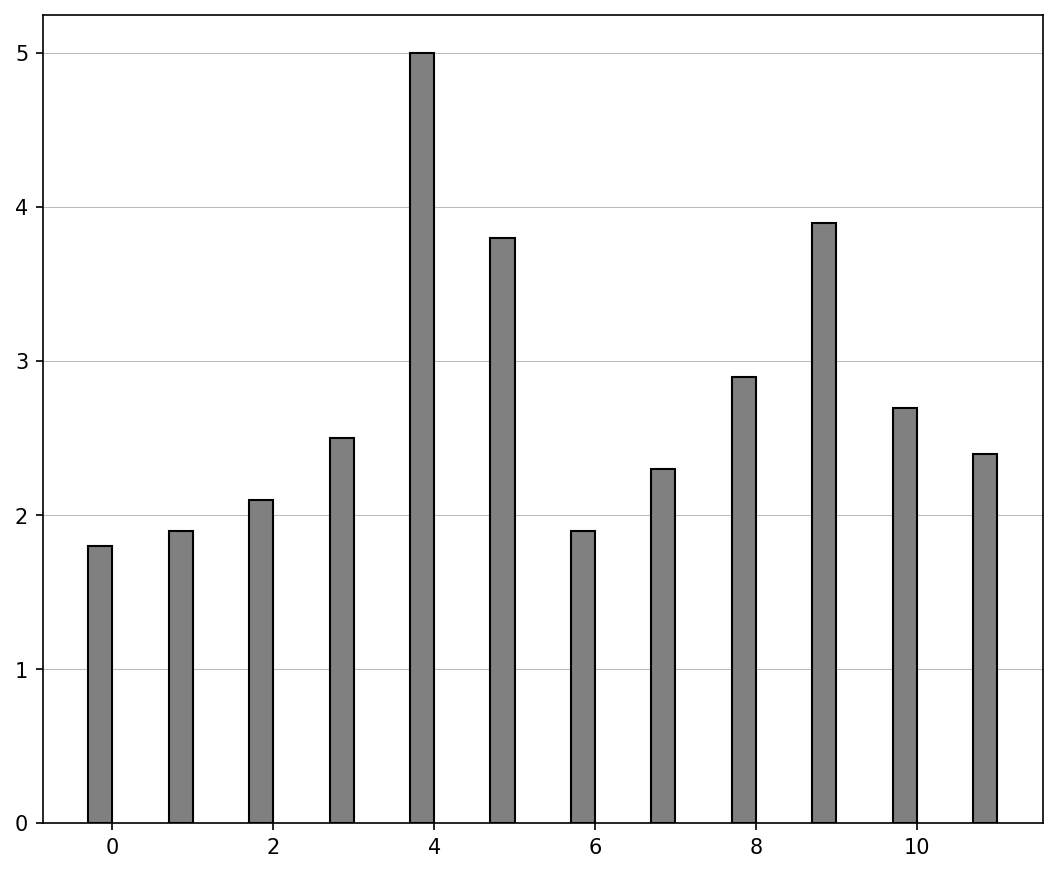

In [263]:
f = plt.figure()
gridspec = f.add_gridspec(1, 1)

ax1 = f.add_subplot(gridspec[0, 0])

months = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."]
centers = np.arange(len(months))
bar_width = 0.3

vals = [1.8, 1.9, 2.1, 2.5, 5.0, 3.8, 1.9, 2.3, 2.9, 3.9, 2.7, 2.4]
ax1.bar(centers - 0.15, vals, linewidth=1, color=SHADE_COLORS[0], edgecolor=LINE_COLORS[0], width=bar_width)

# vals = [2.8, 2.9, 3.1, 1.5, 4.3, 3.7, 1.9, 2.2, 2.0, 1.9, 1.7, 2.5]
# ax1.bar(centers + 0.15, vals, linewidth=1, color=SHADE_COLORS[1], edgecolor=LINE_COLORS[0], width=bar_width)

ax1.grid(False)
ax1.grid(axis="y")
#ax1.set_xmargin(1)

f.show()

In [245]:
ax3.get_xbound()

(5839.0, 29200.0)

In [171]:
dir(ax2)

['ArtistList',
 '_AxesBase__clear',
 '_GeoAxes__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_boundary',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_different_canvas',
 '_done_img_factory',
 '_draw_preprocess',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameo